Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def check_crypto_rate(crypto_curr: str, fiat: str,start_date = dt.datetime(2023,1,1), end_date=dt.datetime.now()):
    df = yf.download(f'{crypto_curr}-{fiat}', start=start_date, end=end_date)
    return df

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='Adj Close'>

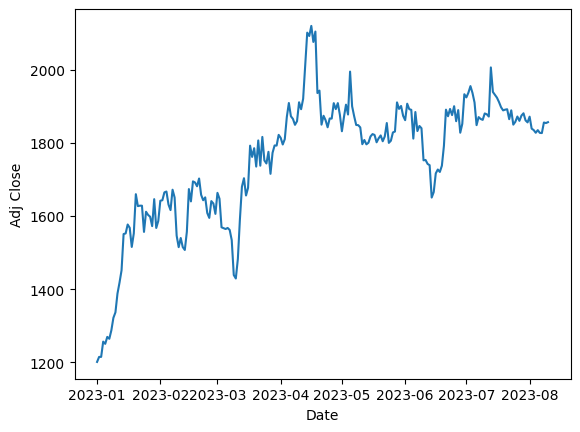

In [4]:
x = check_crypto_rate("ETH","USD",start_date = dt.datetime(2023,1,1), end_date=dt.datetime.now()).reset_index()
sns.lineplot(x=x['Date'], y= x['Adj Close'])

In [5]:
check_crypto_rate("ETH","USD").head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,1196.713623,1203.475342,1192.885376,1200.964844,1200.964844,2399674550
2023-01-02,1201.103271,1219.860596,1195.214966,1214.656616,1214.656616,3765758498
2023-01-03,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131
2023-01-04,1214.718628,1264.807495,1213.168823,1256.526611,1256.526611,6404416893
2023-01-05,1256.484619,1258.571533,1245.173096,1250.438599,1250.438599,4001786456


[*********************100%***********************]  1 of 1 completed


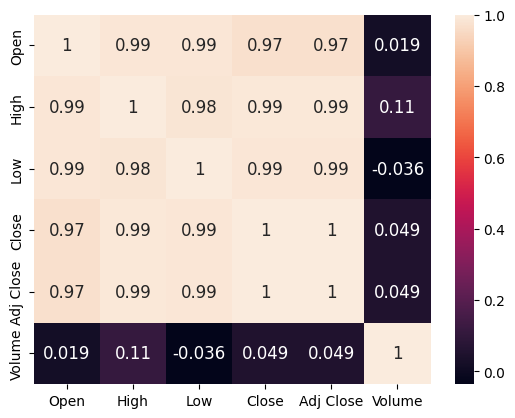

In [6]:
corr = check_crypto_rate("ETH","USD").corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 12}) # font size
plt.show()

Scaling data

In [7]:
scaler=MinMaxScaler((0,1))
X = scaler.fit_transform(check_crypto_rate("ETH","USD")[["Open","High","Low","Close","Volume"]].values)
scaler = MinMaxScaler((0,1)) #scaling values between 0-1
y = scaler.fit_transform(check_crypto_rate("ETH","USD")['Adj Close'].values.reshape(-1,1))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2)) #preventing overfitting
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu')) #finishing with one layer as want to predict only one price
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=200, batch_size=200)

Epoch 1/200
1/1 [==============================] - 8s 8s/step - loss: 0.3915
Epoch 2/200
1/1 [==============================] - 0s 24ms/step - loss: 0.3692
Epoch 3/200
1/1 [==============================] - 0s 26ms/step - loss: 0.3443
Epoch 4/200
1/1 [==============================] - 0s 23ms/step - loss: 0.3213
Epoch 5/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2976
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 0.2721
Epoch 7/200
1/1 [==============================] - 0s 24ms/step - loss: 0.2443
Epoch 8/200
1/1 [==============================] - 0s 20ms/step - loss: 0.2182
Epoch 9/200
1/1 [==============================] - 0s 24ms/step - loss: 0.1895
Epoch 10/200
1/1 [==============================] - 0s 24ms/step - loss: 0.1565
Epoch 11/200
1/1 [==============================] - 0s 24ms/step - loss: 0.1305
Epoch 12/200
1/1 [==============================] - 0s 24ms/step - loss: 0.0996
Epoch 13/200
1/1 [==============================] -

Testing module

In [10]:
#loss is decreasing and accuracy increasing, which is good result! 

In [11]:
model.evaluate(X_test, model.predict(y_test), batch_size=200)

1/1 [==============================] - 2s 2s/step - loss: 0.2993


0.29933226108551025

In [12]:
inv_scaler_result = scaler.inverse_transform(model.predict(y_test))


2/2 [==============================] - 0s 0s/step


In [13]:
_max= np.max(inv_scaler_result)
_min= np.min(inv_scaler_result)
_median= np.median(inv_scaler_result)
_std = np.std(inv_scaler_result)

pd.DataFrame({'max': [_max], 'min': [_min], 'median': [_median],'std':[_std]})

,max,min,median,std
0,1277.69873,1250.492188,1268.002686,6.156339


In [ ]:
#Saving model
#model.save('TensorFlowModel')

In [ ]:
#cleaing model data
#del model

In [ ]:
#model reload to memory 
#model = load_model('TensorFlowModel')